# Data Exploration 

In [1]:
#Importing the required packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing the train dataset
train = pd.read_csv("train.csv")

In [3]:
#Exploring the structure of the Data 
train.head(10)

,ID,keywords,age,sex
0,1,fibre:16;quoi:1;dangers:1;combien:1;hightech:1...,62,F
1,2,restaurant:1;marrakech.shtml:1,35,M
2,3,payer:1;faq:1;taxe:1;habitation:1;macron:1;qui...,45,F
3,4,rigaud:3;laurent:3;photo:11;profile:8;photopro...,46,F
4,5,societe:1;disparition:1;proche:1;m%c3%a9lanie....,42,F
5,6,portes:1;prives:1;entre:1;conso:1;mer:1;enfant...,49,F
6,8,son:1;laposte:1;forum:1;mobile:1;affich:1;forf...,47,F
7,9,location:1;preavis:1;mois:1;faq:1;modele:1;dep...,52,M
8,12,iphone:1;homme:1;vue:1;deuxieme:1;internet:1;g...,49,F
9,13,NaN,46,M


As we can observe in the train-set, the column of keywords is packed with the all the keywords per ID and the reseptive frquency. We can elicitate the requirement to parse this section of the data in order to make processable for the model. As for age we will later decide that we cut in up into bins to facilitate as a target_variable. The variable sex can be dummified. 

In [12]:
train['sex']= train['sex'].replace('M',0)
train['sex']= train['sex'].replace('F',1)

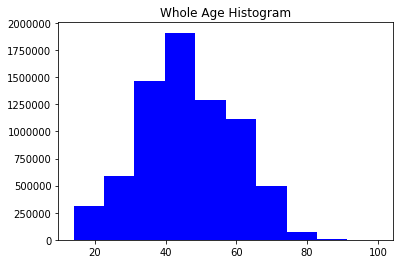

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

In [24]:
plt.hist(train['age'], bins = 10, color = 'blue')
plt.title("Whole Age Histogram")
plt.show()
plt.hist

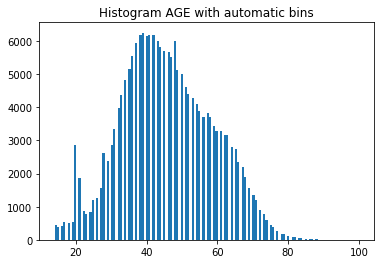

In [15]:
plt.hist(train.age, bins='auto')
plt.title("Histogram AGE with automatic bins")
plt.show()

In [23]:
train['sex'].value_counts()

0    4051936
1    3213119
Name: sex, dtype: int64

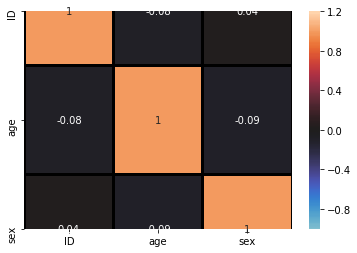

In [20]:
#Let's check the correlations between our variables. Check for problem of multi-collinearity
sns.heatmap(train.corr(),annot = True, fmt='.0g',vmin=-1, vmax=1.2, center= 0, linewidths=2, linecolor='black')

In [21]:
train.corr()

,ID,age,sex
ID,1.000000,-0.078177,0.038564
age,-0.078177,1.000000,-0.087327
sex,0.038564,-0.087327,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a214a9210>,
      dtype=object)

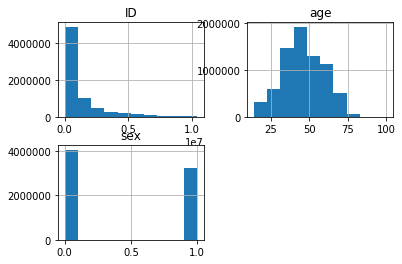

In [19]:
train.hist()

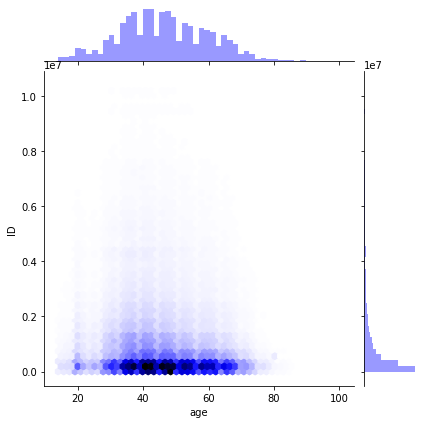

In [22]:
sns.jointplot(train.age, train.ID, kind= 'hex', color= 'blue')

In [25]:
#Number of connexions counter: Counts the number of Users who have logged on a pre-defined number of times.

Many_co = train['ID'].value_counts()>5000
columns = ['Heavy_User', 'ID']
Connexions = pd.DataFrame(Many_co, columns=columns, index = train.ID)

print("Count of ID's with more than 5,000 connexions: ", Connexions['ID'].value_counts())

Count of ID's with more than 5,000 connexions:  False    7237740
True       27315
Name: ID, dtype: int64


In [26]:
#ID 933 is the only user with over 5,000 hits. 
#WARNING that the models are not biased because of this outlier 
train.ID.value_counts()[933]

27315

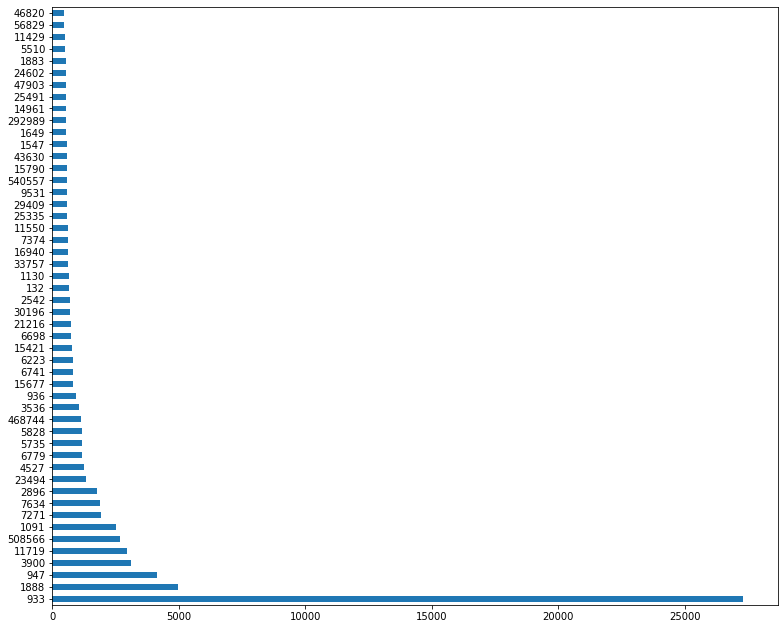

In [27]:
#The majority of IDs logged in less than 5000 times. More specifically, they are more around 1000 connections. 
fig, ax = plt.subplots(figsize=(13,11))         # Sample figsize in inches

train['ID'].value_counts()[:50].plot(kind='barh')

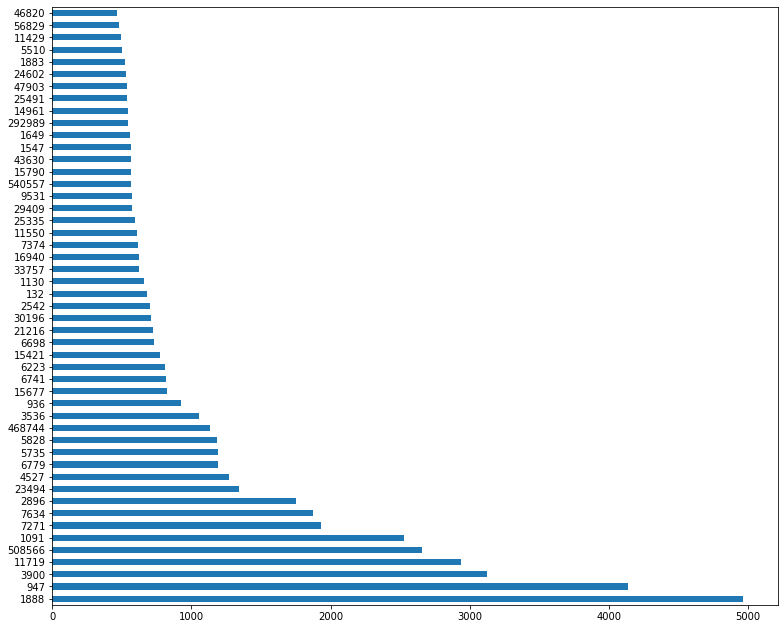

In [28]:
fig, ax = plt.subplots(figsize=(13,11))         # Sample figsize in inches

train['ID'].value_counts()[1:50].plot(kind='barh')